## Loan Status Prediction

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

## Prepare data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop(columns=['Loan_ID'] , axis=1 ,inplace= True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(f"The shape of the Data Frame is: {df.shape}")

The shape of the Data Frame is: (614, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 614 entries, 0 to 613

Data columns (total 12 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Gender             601 non-null    object 

 1   Married            611 non-null    object 

 2   Dependents         599 non-null    object 

 3   Education          614 non-null    object 

 4   Self_Employed      582 non-null    object 

 5   ApplicantIncome    614 non-null    int64  

 6   CoapplicantIncome  614 non-null    float64

 7   LoanAmount         592 non-null    float64

 8   Loan_Amount_Term   600 non-null    float64

 9   Credit_History     564 non-null    float64

 10  Property_Area      614 non-null    object 

 11  Loan_Status        614 non-null    object 

dtypes: float64(4), int64(1), object(7)

memory usage: 57.7+ KB


In [6]:
#Statistical informations
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Show duplicated rows
df.duplicated().sum()

0

In [8]:
#Show NaN values
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Explore

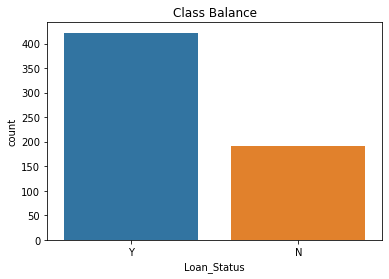

In [9]:
sns.countplot(x=df['Loan_Status'])
plt.title('Class Balance');

In [10]:
df = df.replace(to_replace= '3+',value=4)
df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

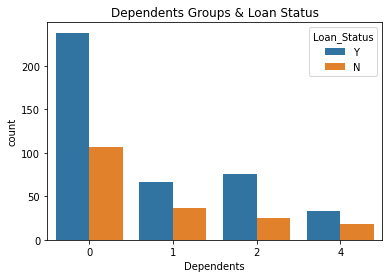

In [11]:
sns.countplot(x= df['Dependents'] , hue= df['Loan_Status'])
plt.title('Dependents Groups & Loan Status');

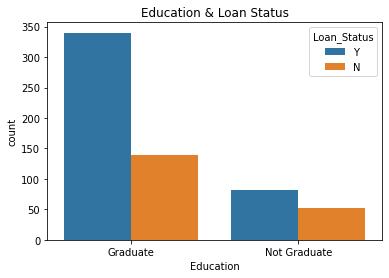

In [12]:
sns.countplot(x= df['Education'] , hue= df['Loan_Status'])
plt.title('Education & Loan Status');

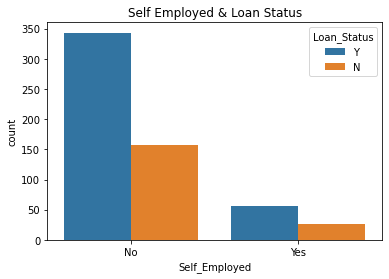

In [13]:
sns.countplot(x= df['Self_Employed'] , hue= df['Loan_Status'])
plt.title('Self Employed & Loan Status');

## Split

In [14]:
target= 'Loan_Status'
X= df.drop(columns=[target])
y= df[target]
print(f'X Shape {X.shape}')
print(f'y Shape {y.shape}')

X Shape (614, 11)

y Shape (614,)


In [15]:
X_test , X_train , y_test , y_train = train_test_split(X,y,test_size= 0.2 , random_state= 42)

In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (123, 11)

y_train shape: (123,)

X_test shape: (491, 11)

y_test shape: (491,)


## Baseline 

In [17]:
acc_baseline = df['Loan_Status'].value_counts(normalize= True).max()
print(f'Baseline Accuracy is {acc_baseline}')

Baseline Accuracy is 0.6872964169381107


## iterate

In [18]:
def train(model , model_name):
    model.fit(X_train, y_train)
    print(f'training accuracy of {model_name} is: {model.score(X_test , y_test)}')
    print(f'testing accuracy of {model_name} is: {model.score(X_test , y_test)}')
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        svm_model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(y_test , model.predict(X_test)))

## SVM 

In [19]:
#Build Model
svm_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    SVC(kernel='linear')
)

In [20]:
train(svm_model , "SVC" )

training accuracy of SVC is: 0.814663951120163

testing accuracy of SVC is: 0.814663951120163


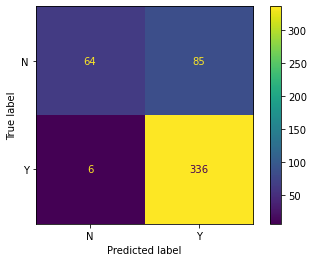

In [21]:
conf_matrix(svm_model)

In [22]:
class_report(svm_model)

              precision    recall  f1-score   support



           N       0.91      0.43      0.58       149

           Y       0.80      0.98      0.88       342



    accuracy                           0.81       491

   macro avg       0.86      0.71      0.73       491

weighted avg       0.83      0.81      0.79       491




## Logistic Regression

In [23]:
#Build Model
Logistic_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    LogisticRegression()
)

In [24]:
train(Logistic_model , "LogisticRegression" )

training accuracy of LogisticRegression is: 0.8207739307535642

testing accuracy of LogisticRegression is: 0.8207739307535642


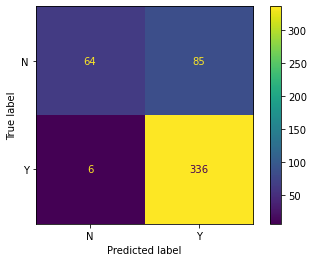

In [25]:
conf_matrix(Logistic_model)

In [26]:
class_report(Logistic_model)

              precision    recall  f1-score   support



           N       0.92      0.45      0.60       149

           Y       0.80      0.98      0.88       342



    accuracy                           0.82       491

   macro avg       0.86      0.72      0.74       491

weighted avg       0.84      0.82      0.80       491




## Communicate

In [27]:
features = X_test.columns
importances= Logistic_model.named_steps['logisticregression'].coef_[0]

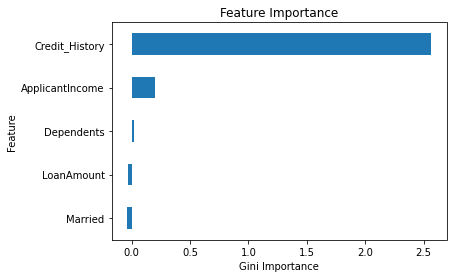

In [28]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");